#Features Extraction

In [ ]:
#hog features
#laplacian transform
#local binary pattern
# etc

from skimage.feature import hog
from tensorflow.keras.datasets import fashion_mnist as mnist
from random import shuffle
import sys
import numpy as np


# add this
def get_hog(image):
  image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
  return image
  
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()
image_size = X_train_m.shape[1]

# add this
X_train_m_hog = np.array([get_hog(i).flatten() for i in X_train_m])
X_test_m_hog = np.array([get_hog(i).flatten() for i in X_test_m])

X_train_m = np.reshape(X_train_m, [-1, image_size*image_size])
X_test_m = np.reshape(X_test_m, [-1, image_size*image_size])
X_train_m = X_train_m.astype('float32') / 255
X_test_m = X_test_m.astype('float32') / 255




#Model Serialization (Saving and Loading)

In [ ]:


from sklearn import svm
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import classification_report
import json

class MLModel:
  def __init__(self, target_model, save_path):
    self.save_path = save_path
    self.models = {"ols":linear_model.LinearRegression(), 
            "svm":svm.SVC(), 
            "ridge":linear_model.Ridge(alpha=.5), 
            "lasso":linear_model.Lasso(alpha=0.1), 
            "knn":neighbors.KNeighborsClassifier(5), 
            "randomforest":RandomForestClassifier(n_estimators=10),
            "sgd_svm":linear_model.SGDClassifier(max_iter=1000, tol=1e-3)}
    
    if target_model is not None:
      if target_model in self.models.keys():
        self.model = self.models[target_model]
      else:
        raise NotImplementedError
    
    self.clf = None
  
  def fit(self, X, y):
    #put your code down here
    self.clf = self.model.fit(X, y)

  def save(self, mode="pickle"):
    if mode == "pickle":
      if self.clf is not None:
        joblib.dump(self.clf, self.save_path)
      else:
        raise ValueError("train before saving the classifier")

    elif mode == "json":
      if self.clf is not None:
        model_dict = {}
        model_dict["clf"] = self.clf
        json_clf = json.dumps(model_dict, indent=4)
        with open(self.save_path+"/model.json", 'w') as file:
            file.write(json_clf)
        file.close()
      else:
        raise ValueError("Train before saving the classifier")

    else:
      raise NotImplementedError

  def load(self, path, mode):
    if mode == "pickle":
      self.clf = joblib.load(path)
      print(self.clf)
    elif mode == "json":
      with open(path, 'r') as file:
          model_dict = json.load(file)
      self.clf = model_dict["clf"]
    else:
      raise NotImplementedError
    return self.clf

  def predict(self, X):
    predictions = self.clf.predict(X)
    return predictions

  def evaluate(self, y_true, y_pred, target_names):
    # put your code down here add eval
    print(classification_report(y_true, y_pred, target_names=target_names))

    

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!ls

sample_data  svm.pkl


In [ ]:
# calling the ML calss
# model_svm = MLModel("svm", "./svm.pkl")
# model_svm.fit(X_train_m[np.arange(1000)], y_train_m[np.arange(1000)])
# predictions = model_svm.predict(X_test_m)
# print(predictions)
# sum(predictions==y_test_m)*1.0/len(y_test_m)
# model_svm.evaluate(predictions, y_test_m, target_names=[str(i) for i in np.unique(y_test_m)])
# model_svm.save()

loaded_svm_model = model_svm.load('./svm.pkl',  mode="pickle")
predictions = loaded_svm_model.predict(X_test_m)
print(predictions)
sum(predictions==y_test_m)*1.0/len(y_test_m)
model_svm.evaluate(predictions, y_test_m, target_names=[str(i) for i in np.unique(y_test_m)])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[9 2 1 ... 8 1 7]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1176
           1       0.91      0.98      0.95       928
           2       0.56      0.70      0.62       795
           3       0.84      0.79      0.82      1062
           4       0.69      0.66      0.68      1048
           5       0.87      0.87      0.87       994
           6       0.46      0.47      0.46       983
           7       0.87      0.86      0.87      

#Online Learning

In [ ]:
# Written by Davy@ML_training
#____________________________

class OnlineLearning(MLModel):
  def __init__(self, target_mode, save_path):
    MLModel.__init__(target_model=target_mode, save_path=save_path)
    self.ol_safe_models = ["sdg_svm"]  # online learning safe models

  def partial_fit(self, X, y):
    if target_model in self.ol_safe_models:
      return self.model.partial_fit
    else:
      raise ValueError("Target model is not in allowed online learning safe models!")


##More online safe models

#API Endpoint

In [ ]:
!pip install process_requests

ERROR: Could not find a version that satisfies the requirement process_requests (from versions: none)
ERROR: No matching distribution found for process_requests


In [ ]:
#from flask_cors import CORS
from flask import Flask, request, json
#from process_requests import Process
from flask import jsonify


# create flask app
app = Flask(__name__)
#CORS(app)

def get_predictions(target_model):
  # put your code below
  model_svm = MLModel("svm", "./svm.pkl")
  loaded_svm_model = model_svm.load('./svm.pkl',  mode="pickle")
  predictions = loaded_svm_model.predict(X_test_m)
  return predictions


@app.route('/get_predictions', methods=["POST"])
def main():
  data = request.get_json()
  target_model = data['target_model']
  return get_predictions(target_model=target_model)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


#Introduction to Tensorflow

In [ ]:
import tensorflow as tf

x = 5
y = 3

# multiplication
xy = tf.math.multiply(x,y)
tf.print(xy)

with tf.Session() as sess:
  print(xy.eval())

15


##Trees Classifier and KNN in Tensorflow

In [ ]:
# example retrieved from tensorflow API
#______________________________________

import pandas as pd 
from IPython.display import clear_output

import tensorflow as tf
from tensorflow.estimator import BoostedTreesClassifier
from tensorflow.keras.datasets import fashion_mnist as mnist

Xtrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
Xtest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = Xtrain.pop('survived')
y_test = Xtest.pop('survived')


fc = tf.feature_column

# cc -> categorical columns
cc = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
# numerical columns
nc = ['age', 'fare']

def one_hot_cat_column(feature_name, vocab):
  return fc.indicator_column(fc.categorical_column_with_vocabulary_list(feature_name, vocab))

feature_columns = []
for feature_name in cc:
  # Need to one-hot encode categorical features.
  vocabulary = Xtrain[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in nc:
  feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

input_size = 28
batch_size = len(y_train)//2
epochs = 33

def generate_dataset(X, y, n_epochs=epochs, shuffle=True):
  def get_inputs():
    len_dataset = len(y)
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(len_dataset)
    
    #epoches
    dataset = dataset.repeat(n_epochs)
    dataset = dataset.batch(len_dataset) # use all dataset (small dataset)
    return dataset
  return get_inputs

get_train_input = generate_dataset(Xtrain, y_train)
get_test_input = generate_dataset(Xtest, y_test)
model_trees = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer=1)
model_trees.train(get_train_input, max_steps=100)
results = model_trees.evaluate(get_test_input)
clear_output()

pd.Series(results).to_frame()
predictions = model_trees.predict(get_test_input)
pd.Series(predictions).iloc[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvuzisj5i/model.ckpt-32
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.96517205], dtype=float32),
 'logits': array([3.3218849], dtype=float32),
 'probabilities': array([0.03482799, 0.965172  ], dtype=float32)}

## KNN with Tensoflow

In [ ]:
# example retrieved from,
# https://github.com/aymericdamien/TensorFlow-Examples
#_____________________________________________________

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as mnist
from random import shuffle
import sys

(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()
image_size = X_train_m.shape[1]
X_train_m = np.reshape(X_train_m, [-1, image_size*image_size])
X_test_m = np.reshape(X_test_m, [-1, image_size*image_size])
X_train_m = X_train_m.astype('float32') / 255
X_test_m = X_test_m.astype('float32') / 255

shuffle_idxs_train = np.arange(len(X_train_m))
shuffle_idxs_test = np.arange(len(X_test_m))
shuffle(shuffle_idxs_train)
shuffle(shuffle_idxs_test)

X_train_m, y_train_m = X_train_m[shuffle_idxs_train], y_train_m[shuffle_idxs_train]
X_test_m, y_test_m = X_test_m[shuffle_idxs_test], y_test_m[shuffle_idxs_test]  
X_test_m, y_test_m = X_test_m[np.arange(1000)], y_test_m[np.arange(1000)]  # testing on 1000

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.
# Start training
with tf.Session() as sess:
    # loop over test data
    for i in range(len(X_test_m)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: X_train_m, xte: X_test_m[i, :]})
        
        prediction = y_train_m[nn_index] # np.argmax is optional here since only one value is returned
        # Calculate accuracy
        if prediction == y_test_m[i]:
            accuracy += 1./len(X_test_m)
        print("idx: ", i, "prediction: ",  prediction, "true label: ", y_test_m[i])
    print("Done!")
    print("Accuracy:", accuracy)

idx:  0 prediction:  3 true label:  3
idx:  1 prediction:  1 true label:  1
idx:  2 prediction:  7 true label:  7
idx:  3 prediction:  4 true label:  4
idx:  4 prediction:  8 true label:  8
idx:  5 prediction:  1 true label:  1
idx:  6 prediction:  8 true label:  8
idx:  7 prediction:  2 true label:  2
idx:  8 prediction:  9 true label:  9
idx:  9 prediction:  2 true label:  6
idx:  10 prediction:  9 true label:  9
idx:  11 prediction:  2 true label:  6
idx:  12 prediction:  7 true label:  7
idx:  13 prediction:  7 true label:  7
idx:  14 prediction:  0 true label:  0
idx:  15 prediction:  2 true label:  2
idx:  16 prediction:  4 true label:  3
idx:  17 prediction:  0 true label:  0
idx:  18 prediction:  7 true label:  7
idx:  19 prediction:  1 true label:  1
idx:  20 prediction:  8 true label:  8
idx:  21 prediction:  6 true label:  6
idx:  22 prediction:  3 true label:  3
idx:  23 prediction:  5 true label:  5
idx:  24 prediction:  3 true label:  3
idx:  25 prediction:  5 true label:

#Multi-layer Perceptron

In [ ]:


from tensorflow.keras.datasets import fashion_mnist as mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Conv2D, Flatten, BatchNormalization
from tensorflow.keras.layers import Embedding, Masking, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()
image_size = X_train_m.shape[1]
X_train_m = np.reshape(X_train_m, [-1, image_size, image_size, 1])
X_test_m = np.reshape(X_test_m, [-1, image_size, image_size, 1])
X_train_m = X_train_m.astype('float32') / 255
X_test_m = X_test_m.astype('float32') / 255

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Written by Davy@ML_training
#____________________________

input_size = 28
batch_size = 32
epochs = 16

# model building and training
model_dense = Sequential()
model_dense.add(Dense(16, input_shape=(input_size, input_size, 1), activation='relu'))
model_dense.add(Dense(12, activation='relu'))
model_dense.add(GlobalAveragePooling2D())
model_dense.add(Dense(8, activation='relu'))
model_dense.add(Dense(len(np.unique(y_train_m)), activation='softmax'))
model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dense.fit(X_train_m, to_categorical(y_train_m), epochs=epochs, validation_split=0.1, batch_size=batch_size)
predicted = model_dense.predict(X_test_m)



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 54000 samples, validate on 6000 samples
Epoch 1/16
54000/54000 [==============================] - 7s 124us/sample - loss: 2.0118 - acc: 0.2249 - val_loss: 1.8265 - val_acc: 0.2915
Epoch 2/16
54000/54000 [==============================] - 5s 92us/sample - loss: 1.7893 - acc: 0.2956 - val_loss: 1.7527 - val_acc: 0.3135
Epoch 3/16
54000/54000 [==============================] - 5s 92us/sample - loss: 1.7210 - acc: 0.3239 - val_loss: 1.6948 - val_acc: 0.3393
Epoch 4/16
54000/54000 [==============================] - 5s 92us/sample - loss: 1.6833 - acc: 0.3312 - val_loss: 1.6740 - val_acc: 0.3318
Epoch 5/16
54000/54000 [==============================] - 5s 91us/sample - loss: 1.6722 - acc: 0.3373 - val_loss: 1.6658 - val_acc: 0.3423
Epoch 6/16
54000/54000 [==============================] - 5s 92us/sample - loss: 1.6664 - acc: 0.3413 - val_loss: 1.6608 - val_acc: 0.3442
Epoch 7/16
54000/54000 [===========

In [ ]:
print(predicted)
predictions = [np.argmax(i) for i in predicted]
ml_model = MLModel(target_model=None, save_path=None)
ml_model.evaluate(predictions, y_test_m, target_names=[str(i) for i in np.unique(y_test_m)])

[[2.69783870e-03 2.50929326e-01 9.51162801e-05 ... 3.27989131e-01
  1.44871101e-02 2.60431301e-02]
 [1.26320526e-01 4.44519101e-04 2.13652015e-01 ... 1.16438576e-04
  1.76631853e-01 3.78686190e-02]
 [1.55242078e-03 4.98553485e-01 5.16447108e-05 ... 1.46847188e-01
  1.57283414e-02 1.15920916e-01]
 ...
 [1.56954420e-03 3.16652298e-01 4.76876485e-05 ... 3.10513347e-01
  1.11299353e-02 2.85493676e-02]
 [3.15540237e-04 4.70762700e-01 6.27183863e-06 ... 2.65346527e-01
  4.47233068e-03 2.38411576e-02]
 [8.04818794e-02 4.80957441e-02 8.36480223e-03 ... 2.41667122e-01
  7.58230388e-02 2.26404369e-02]]
              precision    recall  f1-score   support

           0       0.45      0.28      0.35      1629
           1       0.67      0.39      0.49      1718
           2       0.41      0.31      0.35      1325
           3       0.08      0.22      0.12       356
           4       0.35      0.30      0.32      1139
           5       0.61      0.54      0.57      1121
           6       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##CNN Classifier

In [ ]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

input_size = 28
batch_size = 32
epochs = 24

# model building and training
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(input_size,input_size,1)))
model_cnn.add(Conv2D(32, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(16, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(8, kernel_size=3, activation="relu"))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(32, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(16, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(8, kernel_size=3, activation="relu"))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(32, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(16, kernel_size=3, activation="relu"))
model_cnn.add(Conv2D(8, kernel_size=3, activation="relu"))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(len(np.unique(y_train_m)), activation='softmax'))


model_cnn.add(Dense(len(np.unique(y_train_m)), activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.fit(X_train_m, to_categorical(y_train_m), epochs=epochs, validation_split=0.1, batch_size=batch_size, workers=4, use_multiprocessing=True)
predicted = model_cnn.predict(X_test_m)

# put your eval code below from the MLModel class


Found GPU at: /device:GPU:0
Train on 54000 samples, validate on 6000 samples
Epoch 1/24
54000/54000 [==============================] - 16s 296us/sample - loss: 1.5758 - acc: 0.4302 - val_loss: 1.5501 - val_acc: 0.4015
Epoch 2/24
54000/54000 [==============================] - 15s 278us/sample - loss: 1.1680 - acc: 0.5006 - val_loss: 1.1329 - val_acc: 0.4882
Epoch 3/24
54000/54000 [==============================] - 15s 276us/sample - loss: 1.0013 - acc: 0.6591 - val_loss: 0.9477 - val_acc: 0.7020
Epoch 4/24
54000/54000 [==============================] - 15s 278us/sample - loss: 0.8573 - acc: 0.7533 - val_loss: 0.8156 - val_acc: 0.7653
Epoch 5/24
54000/54000 [==============================] - 15s 277us/sample - loss: 0.7488 - acc: 0.7905 - val_loss: 0.7070 - val_acc: 0.7945
Epoch 6/24
54000/54000 [==============================] - 15s 278us/sample - loss: 0.6654 - acc: 0.8076 - val_loss: 0.6449 - val_acc: 0.8068
Epoch 7/24
54000/54000 [==============================] - 15s 280us/sample - 

In [ ]:
print(predicted)
predictions = [np.argmax(i) for i in predicted]
ml_model = MLModel(target_model=None, save_path=None)
ml_model.evaluate(predictions, y_test_m, target_names=[str(i) for i in np.unique(y_test_m)])

[[6.86988528e-08 3.47186031e-08 4.91043983e-10 ... 8.82948004e-03
  3.56607279e-06 9.90097642e-01]
 [6.97054784e-05 1.14974682e-06 9.13480759e-01 ... 2.11707970e-07
  6.94951950e-07 1.74400199e-07]
 [2.58766719e-09 9.92584765e-01 2.53212278e-07 ... 1.12784555e-08
  1.37498887e-06 8.49026804e-09]
 ...
 [4.17107949e-04 1.00390229e-04 8.79323281e-08 ... 3.32655577e-06
  9.84706819e-01 4.18112941e-05]
 [2.92155922e-09 9.92115200e-01 2.76127992e-07 ... 1.23980435e-08
  1.48084314e-06 9.38667188e-09]
 [5.34089573e-04 1.56557762e-05 3.01738008e-04 ... 2.18738023e-05
  4.61653661e-04 8.56805709e-04]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1099
           1       0.97      0.99      0.98       973
           2       0.83      0.83      0.83       991
           3       0.88      0.88      0.88      1001
           4       0.84      0.81      0.83      1032
           5       0.96      0.97      0.97       988
           6       0.

#Dropout - Regularization - Weight Decay

# Auto-encoders

In [ ]:

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten,  LSTM, Dropout, Masking, Embedding
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

np.random.seed(1337)

# apply noise
noise = np.random.normal(loc=0.5, scale=0.5, size=X_train_m.shape)
X_train_noisy = X_train_m + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=X_test_m.shape)
X_test_noisy = X_test_m + noise

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16

# buid encoder model
inputs = Input(shape=input_shape)
x = Conv2D(filters=32, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(inputs)
x = Conv2D(filters=64, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(x)
# shape info needed to build decoder model
shape = K.int_shape(x)
# latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
# instantiate encoder model
encoder = Model(inputs, latent)


# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
# stack of transposed conv2D blocks
x = Conv2DTranspose(filters=64, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(filters=32, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(filters=1, kernel_size=kernel_size, padding='same')(x)
outputs = Activation('sigmoid', name='decoder_output')(x)
# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')

model = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
model.compile(loss='mse', optimizer='adam')
# train the autoencoder
model.fit(X_train_noisy, X_train_m, validation_data=(X_test_noisy, X_test_m), epochs=30, batch_size=batch_size)
# Predict the Autoencoder output from corrupted test images

In [ ]:
X_decoded = model.predict(X_test_noisy)
# add your code for eval below


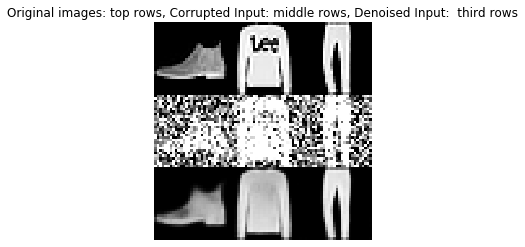

In [ ]:
X_decoded = model.predict(X_test_noisy)
# add your code for eval below

# Display corrupted and denoised images
rows, cols = 1, 3
num = rows * cols
imgs = np.concatenate([X_test_m[:num], X_test_noisy[:num], X_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

#Reccurent Neural Networks

In [ ]:
# you don't have to run this twice
! wget "http://s3.amazonaws.com/data.patentsview.org/20191231/download/botanic.tsv.zip"
! unzip botanic.tsv.zip
! rm botanic.tsv.*

--2020-02-21 00:23:32--  http://s3.amazonaws.com/data.patentsview.org/20191231/download/botanic.tsv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.182|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 548717 (536K) [binary/octet-stream]
Saving to: ‘botanic.tsv.zip’

botanic.tsv.zip     100%[===================>] 535.86K  --.-KB/s    in 0.06s   

2020-02-21 00:23:32 (8.31 MB/s) - ‘botanic.tsv.zip’ saved [548717/548717]

Archive:  botanic.tsv.zip
  inflating: botanic.tsv             


In [ ]:
# retrieved from https://gist.github.com/WillKoehrsen
#_____________________________________________________
from keras.preprocessing.text import Tokenizer
import pandas as pd
data = pd.read_csv("botanic.tsv", sep='\t')
print(data)
X_train_text = data.iloc[:,2]
y_train_text = data.iloc[:,3]

                            uuid  ...            variety
0      001px790v03tx2mu8hboizn5o  ...         KLEPH14267
1      003dzyi55fjhy4girjlkjviwt  ...    Furano 0802D go
2      005o297xh4g2wsvi9pji69u74  ...        Dekcatalina
3      008wpaqvy9bq28w4icpjsyjle  ...         PKMRhips09
4      00dep1rwclwds48xaez1l4nw4  ...  Enchanted Evening
...                          ...  ...                ...
15845  zzqh7k60q1nnjzrcyjqh9ckrf  ...        Sunsurfpapu
15846  zztfvk2jkzgcgrfa05es2orb4  ...       Sunpetu 3881
15847  zztxklqdsco6295e27qeuu3t9  ...           LOBZ0011
15848  zzy3dvgj2ncc8kkc33tnc0oh7  ...           BKPBEEFR
15849  zzzje1nan7przavcm1efh33y7  ...             Pendec

[15850 rows x 4 columns]


In [ ]:
X_train_text
tokenizer = Tokenizer(num_words=None,  filters='!"#$./:?@%&(;<=>)*+,-[\\{|}]^_`~\t\n',  lower=True, split=' ')
tokenizer.fit_on_texts(X_train_text)
sequences = tokenizer.texts_to_sequences(X_train_text)


In [ ]:
word_idx = tokenizer.index_word
'  '.join(word_idx[i] for i in sequences[1][:2])

features = []
labels = []

training_length = 50

# Iterate through the sequences of tokens
for seq in sequences:

    # Create multiple training examples from each sequence
    for i in range(training_length, len(seq)):
        extract = seq[i - training_length:i + 1]

        features.append(extract[:-1])
        labels.append(extract[-1])

num_words = len(tokenizer.index_word)
features = np.array(features)

num_words = len(word_idx) + 1
label_array = np.zeros((len(features), num_words), dtype=np.int8)
for i, j in enumerate(labels):
  label_array[i,j]=1
label_array.shape


(0, 2637)

In [ ]:
! wget https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
! gunzip glove.6B.100d.txt.gz

--2020-02-21 00:27:10--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2020-02-21 00:27:10--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: ‘glove.6B.100d.txt.gz’

glove.6B.100d.txt.g 100%[===================>] 128.18M   106MB/s    in 1.2s    

2020-02-21 00:27:13 (106 MB/s) - ‘glove.6B.100d.txt.gz’ saved [1344

In [ ]:
glove_vectors = './glove.6B.100d.txt'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)

# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vectors.shape[1]))

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector

In [ ]:
word_lookup["analyse"]

array([-0.73862  , -0.05174  , -0.19554  ,  0.51859  , -0.7174   ,
        0.078536 , -0.3118   ,  0.21684  ,  0.31182  , -0.073807 ,
        0.57084  ,  0.38176  , -0.065668 , -0.38791  ,  0.032814 ,
        0.41035  ,  0.5014   ,  0.27714  , -0.13046  ,  0.076753 ,
       -0.44201  , -0.45478  ,  0.056894 , -0.39519  , -0.93726  ,
       -0.87745  , -0.015415 ,  0.43523  ,  0.54693  ,  0.039759 ,
       -0.97827  , -0.26457  , -0.81242  ,  0.62218  , -0.39103  ,
       -0.17434  , -0.18156  , -0.051355 , -0.15265  , -0.81226  ,
       -0.012614 , -0.15408  , -1.0158   , -0.29911  , -1.2598   ,
        0.71481  , -0.21118  , -0.27851  , -0.97034  , -0.044259 ,
        0.27875  ,  0.90445  ,  0.27889  ,  0.25596  , -0.41849  ,
        0.19703  ,  0.47011  ,  0.13859  , -0.25801  ,  0.020773 ,
       -0.59884  ,  0.33474  , -0.64818  , -0.033617 ,  0.13024  ,
        0.069048 , -0.164    , -0.0044823,  0.25418  , -0.10301  ,
        0.68032  ,  0.12396  ,  0.38638  , -0.48752  , -0.0566

In [ ]:
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=num_words,input_length = training_length,
              output_dim=100,weights=[embedding_matrix],trainable=False, mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model_rnn = model.fit(X_train_text,  labels, 
                    batch_size=148, epochs=150)